['IMG_2619.JPG', 'IMG_2620.JPG', 'IMG_2621.JPG', 'IMG_2622.JPG', 'IMG_2623.JPG', 'IMG_2624.JPG', 'IMG_2626.JPG', 'IMG_2627.JPG', 'IMG_2628.JPG', 'IMG_2629.JPG', 'IMG_2630.JPG', 'IMG_2631.JPG', 'IMG_2632.JPG', 'IMG_2633.JPG', 'IMG_2634.JPG', 'IMG_2635.JPG', 'IMG_2636.JPG', 'IMG_2637.JPG', 'IMG_2638.JPG', 'IMG_2639.JPG', 'IMG_2640.JPG', 'IMG_2641.JPG', 'IMG_2642.JPG', 'IMG_2643.JPG', 'IMG_2644.JPG', 'IMG_2645.JPG']
3456
2304


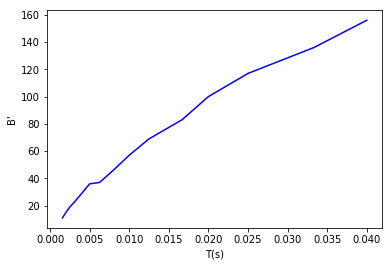

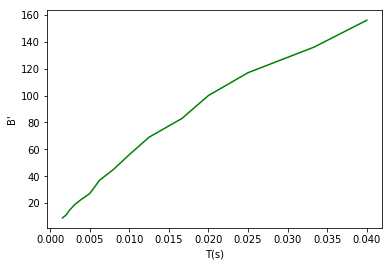

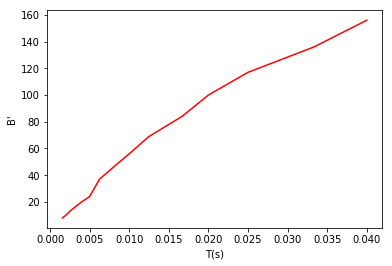

[7, 9, 11, 15, 19, 23, 29, 36, 37, 46, 57, 69, 83, 100, 117, 136, 156, 175, 193, 209, 223, 235, 245, 252, 254] [5, 7, 9, 11, 15, 19, 23, 27, 37, 45, 56, 69, 83, 100, 117, 136, 156, 175, 192, 209, 222, 235, 244, 251, 254] [5, 6, 8, 10, 13, 16, 20, 24, 37, 46, 56, 69, 84, 100, 117, 136, 156, 175, 192, 209, 223, 235, 244, 251, 254]
25


In [33]:
#Part 1 600D
import cv2
from PIL import Image
from pylab import *
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize

papers = []
path = '600D/curvefitset2'
files = os.listdir(path)
files = sorted(files,  key=lambda x: os.path.getmtime(os.path.join(path, x)))
#files = files[::-1]
print(files)
papers = [] * (len(files) - 1)
for i in range(1, len(files)):
    if not os.path.isdir(files[i]):
        papers.append(cv2.imread(path + '/' + files[i], cv2.IMREAD_COLOR))
#print(papers)

T = [1/1000, 1/800, 1/640, 1/500, 1/400, 1/320, 1/250, 1/200, 1/160, 1/125, 1/100, 1/80, 1/60, 1/50, 1/40, 1/30, 1/25, 1/20, 1/15, 1/13, 1/10, 1/8, 1/6, 1/5, 1/4, 0.3]

brightnessB, brightnessG, brightnessR = [], [], []
for i in range(len(papers)):
    b, g, r = cv2.split(papers[i][1200:2400][500:1500])
    bf = b.flatten()
    gf = g.flatten()
    rf = r.flatten()
    brightnessB.append(int(sum(bf) / len(bf)))
    brightnessG.append(int(sum(gf) / len(gf)))
    brightnessR.append(int(sum(rf) / len(rf)))
    #brightnessB, brightnessG, brightnessR = brightnessB[::-1], brightnessG[::-1], brightnessR[::-1]

print(len(papers[0]))
print(len(papers[0][0]))
start, end = 2, 17
plt.plot(T[start:end], brightnessB[start:end], 'blue')
plt.xlabel('T(s)')
plt.ylabel("B'")
plt.show()
plt.plot(T[start:end], brightnessG[start:end], 'green')
plt.xlabel('T(s)')
plt.ylabel("B'")
plt.show()
plt.plot(T[start:end], brightnessR[start:end], 'red')
plt.xlabel('T(s)')
plt.ylabel("B'")
plt.show()
print(brightnessB, brightnessG, brightnessR)
print(len(brightnessB))
#hist(bf, 25)



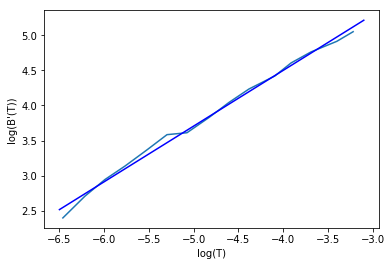

0.7931811292267519 7.671821020752863


In [29]:
#plate the figures
#curve fit
def lineTB(x, A, B):
    return A * x + B


T = [1/1000, 1/800, 1/640, 1/500, 1/400, 1/320, 1/250, 1/200, 1/160, 1/125, 1/100, 1/80, 1/60, 1/50, 1/40, 1/30, 1/25, 1/20, 1/15, 1/13, 1/10, 1/8, 1/6, 1/5, 1/4, 0.3]
logT = [math.log(T[i]) for i in range(len(T))]
logBrightnessB = [math.log(brightnessB[i]) for i in range(len(brightnessB))]
logBrightnessG = [math.log(brightnessG[i]) for i in range(len(brightnessG))]
logBrightnessR = [math.log(brightnessR[i]) for i in range(len(brightnessR))]

#blue channel
aB, kB = optimize.curve_fit(lineTB, logT[start:end], logBrightnessB[start:end])[0]
xB = np.arange(-6.5, -3, 0.1)
yB = aB * xB + kB
plt.plot(logT[start:end], logBrightnessB[start:end])
plt.plot(xB, yB, 'blue')
plt.xlabel('log(T)')
plt.ylabel("log(B'(T))")
plt.show()
print(aB, kB)
#figureTB(logT, logBrightnessG)

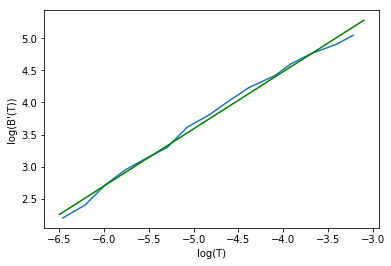

0.8922869233434757 8.050750156307846


In [30]:
#green channe
aG, kG = optimize.curve_fit(lineTB, logT[start:end], logBrightnessG[start:end])[0]
xG = np.arange(-6.5, -3, 0.1)
yG = aG * xG + kG
plt.plot(logT[start:end], logBrightnessG[start:end])
plt.plot(xG, yG, 'green')
plt.xlabel('log(T)')
plt.ylabel("log(B'(T))")
plt.show()
print(aG, kG)

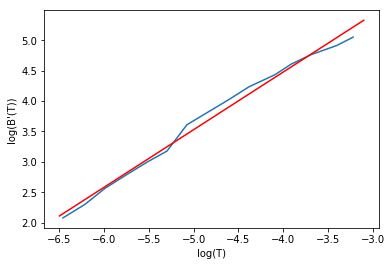

0.9458954377758524 8.259611952470378


In [31]:
#red channe
aR, kR = optimize.curve_fit(lineTB, logT[start:end], logBrightnessR[start:end])[0]
xR = np.arange(-6.5, -3, 0.1)
yR = aR * xR + kR
plt.plot(logT[start:end], logBrightnessR[start:end])
plt.plot(xR, yR, 'red')
plt.xlabel('log(T)')
plt.ylabel("log(B'(T))")
plt.show()
print(aR, kR)

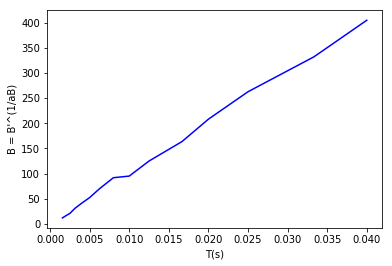

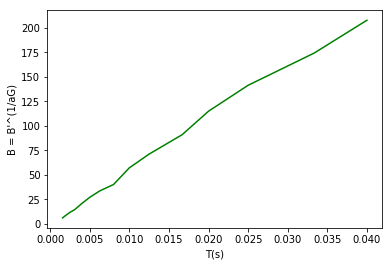

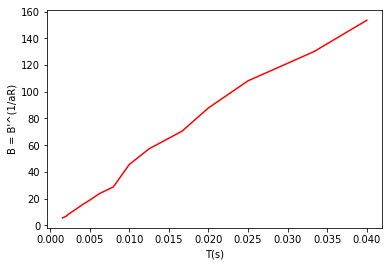

In [32]:

bPrimeB = [brightnessB[i] ** (1 / aB) for i in range(len(brightnessB[start:end]))]
bPrimeG = [brightnessG[i] ** (1 / aG) for i in range(len(brightnessG[start:end]))]
bPrimeR = [brightnessR[i] ** (1 / aR) for i in range(len(brightnessR[start:end]))]
plt.plot(T[start:end], bPrimeB, 'blue')
plt.xlabel('T(s)')
plt.ylabel("B = B'^(1/aB)")
plt.show()
plt.plot(T[start:end], bPrimeG, 'green')
plt.xlabel('T(s)')
plt.ylabel("B = B'^(1/aG)")
plt.show()
plt.plot(T[start:end], bPrimeR, 'red')
plt.xlabel('T(s)')
plt.ylabel("B = B'^(1/aR)")
plt.show()